In [1]:
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce # For python3, "reduce" function is added

import numpy as np

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

v = [x for x in range(1, 11, 2)]
w = [y for y in range(11, 21, 2)]

vector_add(v, w)

[12, 16, 20, 24, 28]

In [2]:
np.array(v) + np.array(w)

array([12, 16, 20, 24, 28])

In [3]:
%timeit vector_add(v, w)
%timeit np.array(v) + np.array(w)

756 ns ± 23.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.3 µs ± 31.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

vector_subtract(v, w)

[-10, -10, -10, -10, -10]

In [5]:
np.array(v) - np.array(w)

array([-10, -10, -10, -10, -10])

In [6]:
v = [x for x in range(1, 11, 2)]
w = [y for y in range(11, 21, 2)]

# Version1
def vector_sum(vectors):
    return reduce(vector_add, vectors)

vectors = [v,w,v,w,v,w]
vector_sum(vectors)

# Version2
def vector_sum_modified(vectors):
    return [sum(value) for value in zip(*vectors)]

vectors = [v,w,v,w,v,w]
vector_sum_modified(vectors)

[36, 48, 60, 72, 84]

In [9]:
np.sum([v,w,v,w,v,w], axis=0)

array([36, 48, 60, 72, 84])

In [10]:
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

scalar = 3
scalar_multiply(scalar, v)

[3, 9, 15, 21, 27]

In [11]:
scalar * np.array(v)

array([ 3,  9, 15, 21, 27])

In [12]:
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

vector_mean([v,v,v,v])

[1.0, 2.0, 3.0, 4.0]

In [13]:
np.mean([v,v,v,v], axis=0)

array([1., 2., 3., 4.])

In [14]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

dot(v, w)

-20

In [15]:
np.dot(v,w)

-20

In [16]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

v = [1,2,3,4]
sum_of_squares(v)

30

In [17]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

magnitude(v)

5.477225575051661

In [18]:
np.linalg.norm(v)

5.477225575051661

In [19]:
#original version
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

squared_distance(v,w) 

100

In [20]:
distance(v,w)

10.0

In [21]:
np.linalg.norm(np.subtract(v,w))

10.0

In [22]:
np.sqrt(np.sum(np.subtract(v,w)**2))

10.0

In [23]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j] for A_i in A]

example_matrix = [[1,2,3,4,5], [11,12,13,14,15], [21,22,23,24,25]]

shape(example_matrix)
get_row(example_matrix, 0)
get_column(example_matrix,3)

[4, 14, 24]

In [25]:
np.shape(example_matrix)
example_matrix = np.array(example_matrix)
example_matrix[0]
example_matrix[:,3]

array([ 4, 14, 24])

In [26]:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix 
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)] 

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)

identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [27]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [28]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 	# user 0
                      [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], 	# user 1
                      [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], 	# user 2
                      [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], 	# user 3
                      [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 	# user 4
                      [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], 	# user 5
                      [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 	# user 6
                      [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 	# user 7
                      [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], 	# user 8
                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] 	# user 9

friendships[0][2] == 1 
friendships[0][8] == 1 


friends_of_five = [i for i, is_friend in enumerate(friendships[5]) if is_friend]
print(friends_of_five)

[4, 6, 7]


In [29]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
        
    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]
        
    return make_matrix(num_rows, num_cols, entry_fn)

A = [[ 1., 0., 0.], [ 0., 1., 2.]]
B = [[ 5., 4., 3.], [ 2., 2., 2.]]

matrix_add(A,B)

[[6.0, 4.0, 3.0], [2.0, 3.0, 4.0]]

In [30]:
np.add(A,B)

array([[6., 4., 3.],
       [2., 3., 4.]])

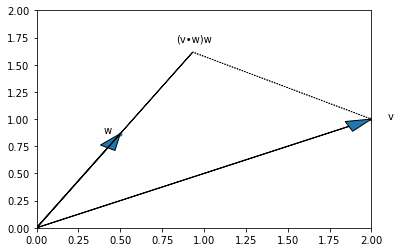

In [31]:
def make_graph_dot_product_as_vector_projection(plt):
    v = [2, 1]
    w = [math.sqrt(.25), math.sqrt(.75)]
    c = dot(v, w)
    vonw = scalar_multiply(c, w)
    o = [0,0]

    plt.arrow(0, 0, v[0], v[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
    plt.arrow(0 ,0, w[0], w[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
    plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
    plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
    plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1], 
              linestyle='dotted', length_includes_head=True)
    plt.scatter(*zip(v,w,o),marker='.')
    plt.axis([0,2,0,2]) # 잘리는 부분이 있어서 변경
    plt.show()

%matplotlib inline
make_graph_dot_product_as_vector_projection(plt)

In [32]:
import numpy as np

""" 1. 파이썬으로 행렬 A와 행렬 B 사이의 점곱을 구현하고 아래 행렬에 대하여 계산해보세요 """
A=[[1, 2, 3],
    [4, 5, 6]]
B=[[1, 2],
    [3, 4],
    [5, 6]]

def my_matrix_dot(A, B):
    gop = 0
    result = 0
    an = []
    for k in range(2):
        answer = [] 
        for i in range(0,2):
            result = 0 
            for j in range(0,3):
                gop = (A[k][j] * B[j][i]) 
                result = result+gop          
            answer.append(result) 
        an.append(answer) 
 
    return an

print(my_matrix_dot(A,B))
print(np.dot(A,B))

[[22, 28], [49, 64]]
[[22 28]
 [49 64]]


In [61]:
""" 2. 파이썬으로 전치 행렬을 구현하고 AT 와 BT 을 계산해 주세요 """
A=[[1, 2, 3],
    [4, 5, 6]]
B=[[1, 2],
    [3, 4],
    [5, 6]]

def my_matrix_transpose(M):
    ans = [[element for element in new]for new in zip(*M)]
    return ans

print(my_matrix_transpose(A))
print(np.transpose(A))
print('============================')
print(my_matrix_transpose(B))
print(np.transpose(B))

[[1, 4], [2, 5], [3, 6]]
[[1 4]
 [2 5]
 [3 6]]
[[1, 3, 5], [2, 4, 6]]
[[1 3 5]
 [2 4 6]]
